<a href="https://colab.research.google.com/github/KacperLudwiczak/Data-Science-Study/blob/main/Lekcja_1_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# Ten kod generuje zbiór danych do prostego problemu regresji liniowej z 2 cechami wejściowymi (xs i zs) i jednym celem wyjściowym.
# Zmienna observations określa liczbę próbek w zbiorze danych, w tym przypadku ustawiona na wartość 1000.
# Zmienna xs jest generowana przez losowe próbkowanie 1000 wartości z rozkładu jednorodnego między -10 a 10, a następnie przekształcona na macierz o rozmiarze (1000,1).
# Zmienna zs jest generowana w ten sam sposób co xs.
# Zmienna generated_inputs jest tworzona poprzez poziome ułożenie macierzy xs i zs, tworząc macierz o rozmiarze (1000,2).
# Zmienna noise jest generowana poprzez losowe próbkowanie 1000 wartości z rozkładu jednorodnego między -1 a 1, a następnie przekształcona na macierz o rozmiarze (1000,1).
# Zmienna generated_targets jest tworzona przez pomnożenie xs przez 2, odjęcie zs pomnożonych przez 3, dodanie stałej 5 i dodanie zmiennej noise. Tworzy to liniową zależność między wejściem a wyjściem, o współczynniku kierunkowym równym 2 dla xs i -3 dla zs, oraz przesunięciu w osi y wynoszącym 5.
# Ostatecznie funkcja np.savez jest używana do zapisania wygenerowanego zbioru danych jako skompresowanego pliku .npz o nazwie 'TF_intro', z danymi wejściowymi i wyjściowymi jako nazwanymi macierzami w pliku.
# Ten zbiór danych może zostać użyty do trenowania i testowania prostych modeli regresji liniowej w różnych frameworkach lub bibliotekach do uczenia maszynowego.

In [ ]:
training_data = np.load('TF_intro.npz')
training_data

In [ ]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

# Ten kod definiuje i trenuje model sieci neuronowej do rozwiązania problemu regresji liniowej z dwoma cechami wejściowymi (xs i zs) i jednym celem wyjściowym, z użyciem biblioteki TensorFlow.
# Zmienna input_size określa liczbę cech wejściowych, w tym przypadku ustawiona na wartość 2.
# Zmienna output_size określa liczbę cech wyjściowych, w tym przypadku ustawiona na wartość 1.
# Model sieci neuronowej jest definiowany za pomocą klasy Sequential z biblioteki tf.keras. W tym przypadku model składa się tylko z jednej warstwy gęstej (Dense) o rozmiarze wynoszącym output_size.
# Funkcja aktywacji nie jest określona, co oznacza, że domyślnie jest to funkcja liniowa.
# Funkcja kosztu (straty) jest określona jako błąd średniokwadratowy (mean_squared_error).
# Optymalizator jest określony jako stochastyczny spadek gradientu (sgd).
# W ostatnim wierszu kodu model jest trenowany na zbiorze treningowym training_data przez 100 epok, a wyjścia są drukowane (verbose=1), co oznacza, że informacje o postępie trenowania będą wyświetlane podczas procesu uczenia.
# W przypadku tego konkretnego modelu, nie zostały określone żadne hiperparametry sieci, takie jak liczba warstw i rozmiar każdej warstwy. Domyślne wartości zostaną zastosowane.

# Warstwy gęste (ang. Dense layers) są jednym z podstawowych typów warstw używanych w sieciach neuronowych. Warstwa gęsta jest zwana także warstwą w pełni połączoną (ang. fully connected layer), ponieważ każdy neuron w tej warstwie jest połączony z każdym neuronem z poprzedniej warstwy, a wynik z każdego neuronu z poprzedniej warstwy jest przekazywany jako wejście dla każdego neuronu w warstwie gęstej.
# W warstwie gęstej każdy neuron przetwarza wejście z poprzedniej warstwy i tworzy wartość wyjściową poprzez mnożenie wejścia przez wagę oraz dodanie biasu, czyli wartości wyjściowej dla wejścia równej 1. Wynik z każdego neuronu w warstwie gęstej jest przekazywany do kolejnej warstwy, aż do ostatniej warstwy, która zwraca wynik końcowy.
# Warstwy gęste są jednym z podstawowych typów warstw stosowanych w sieciach neuronowych ze względu na ich prostotę i łatwość w użyciu. Warstwy gęste pozwalają na zbudowanie sieci neuronowych o różnych architekturach i rozmiarach, co pozwala na modelowanie złożonych zależności między danymi wejściowymi a wyjściowymi.
# W TensorFlow, tworzenie warstwy gęstej odbywa się za pomocą klasy tf.keras.layers.Dense. Ta klasa pozwala na definiowanie liczby neuronów w warstwie oraz funkcji aktywacji, która jest używana do przetwarzania wyniku z każdego neuronu.

# Optymalizator stochastycznego spadku gradientu (ang. stochastic gradient descent optimizer, SGD) jest jednym z najpopularniejszych optymalizatorów używanych w uczeniu maszynowym, szczególnie w przypadku sieci neuronowych.
# SGD jest algorytmem optymalizacji gradientowej, który służy do minimalizacji funkcji kosztu. W przypadku sieci neuronowych, funkcja kosztu jest zazwyczaj określona jako średni błąd kwadratowy (MSE) między przewidywaniami modelu a rzeczywistymi wartościami.
# Algorytm SGD działa w sposób iteracyjny, czyli w kolejnych krokach próbuje znaleźć optymalne wartości wag i biasów, które minimalizują funkcję kosztu. W każdej iteracji algorytm losowo wybiera n obserwacji ze zbioru treningowego (tzw. "batch") i wykorzystuje je do obliczenia gradientu funkcji kosztu. Następnie, korzystając z tego gradientu, aktualizuje wagi i biasy sieci neuronowej w celu minimalizacji funkcji kosztu.
# Stochastyczny spadek gradientu oznacza, że w każdej iteracji algorytm wykorzystuje tylko część danych treningowych (batch), co sprawia, że obliczenia są mniej kosztowne obliczeniowo, ale bardziej szumne. Stochastyczność w SGD pochodzi z losowego wyboru próbek w każdej iteracji, co pozwala uniknąć zagłębiania się w minimum lokalne i zwiększa szanse na osiągnięcie globalnego minimum funkcji kosztu.
# Optymalizator SGD ma kilka parametrów, które mogą zostać ustawione w celu zoptymalizowania procesu uczenia, takie jak rozmiar "batcha", szybkość uczenia i momentum.

# Gradient to wektor pochodnych cząstkowych funkcji wielu zmiennych. Jest to pojęcie z matematyki, które ma zastosowanie w uczeniu maszynowym, zwłaszcza w sieciach neuronowych.
# W przypadku sieci neuronowych, gradient to wektor określający kierunek i szybkość wzrostu funkcji kosztu w zależności od wag i biasów sieci. W praktyce gradient jest wykorzystywany do wyznaczania kierunku w którym należy zmienić wagi i biasy w celu minimalizacji funkcji kosztu.
# W każdej iteracji podczas procesu uczenia maszynowego, algorytm oblicza gradient funkcji kosztu względem wag i biasów i na tej podstawie aktualizuje te wartości w taki sposób, aby minimalizować funkcję kosztu.
# Gradient jest używany w różnych metodach optymalizacji stosowanych w uczeniu maszynowym, takich jak Stochastic Gradient Descent (SGD) czy Backpropagation. W przypadku sieci neuronowych, obliczanie gradientu jest wykonywane za pomocą algorytmu propagacji wstecznej, który umożliwia szybkie i efektywne wyznaczanie gradientów w sieciach z wieloma warstwami.

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 34.9797
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5944
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5469
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6660
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3579
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3361
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3342
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3360
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3369
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3328
Epoch 13/100
32/32 [================

In [ ]:
model.layers[0].get_weights()

[array([[ 2.0050302],
        [-2.9700181]], dtype=float32), array([4.9991336], dtype=float32)]

In [ ]:
weights = model.layers[0].get_weights()[0]
weights
# Ten kod pobiera wagi (parametry) modelu po jego trenowaniu.
# Zmienna weights zawiera wagi modelu.
# W pierwszym wierszu kodu model.layers[0] zwraca pierwszą i jedyną warstwę modelu. W tym przypadku jest to jedna warstwa gęsta (Dense).
# Następnie funkcja get_weights() jest wywoływana na tej warstwie, co zwraca wagi warstwy jako listę dwóch macierzy, reprezentujących wagi i wyrazy wolne (bias).
# W tym przypadku interesuje nas tylko pierwsza macierz, reprezentująca wagi.
# Wartości te są przechowywane w zmiennej weights.
# Wagi te reprezentują parametry modelu, które są wynikiem trenowania. W przypadku tego modelu, który składa się z jednej warstwy gęstej, wagi te określają współczynniki liniowej regresji, która jest wykonywana przez model. Ponieważ ten model ma tylko jedną cechę wyjściową, jego wagi składają się tylko z jednej wartości.

array([[ 2.0050302],
       [-2.9700181]], dtype=float32)

In [ ]:
bias = model.layers[0].get_weights()[1]
bias
# Ten kod pobiera wyrazy wolne (bias) modelu po jego trenowaniu.
# Zmienna bias zawiera wyrazy wolne modelu.
# W pierwszym wierszu kodu model.layers[0] zwraca pierwszą i jedyną warstwę modelu. W tym przypadku jest to jedna warstwa gęsta (Dense).
# Następnie funkcja get_weights() jest wywoływana na tej warstwie, co zwraca wagi warstwy jako listę dwóch macierzy, reprezentujących wagi i wyrazy wolne (bias).
# W tym przypadku interesuje nas tylko druga wartość z tej listy, reprezentująca wyrazy wolne.
# Wartości te są przechowywane w zmiennej bias.
# Wyrazy wolne są dodawane do wyników po zastosowaniu wag, co przesuwa funkcję aktywacji wzdłuż osi y. W przypadku regresji liniowej wyraz wolny określa wartość y-intercept dla linii regresji.

array([4.9991336], dtype=float32)

In [ ]:
model.predict_on_batch(training_data['inputs']).round(1)
# Ten kod przeprowadza predykcję na danych treningowych przy użyciu wytrenowanego modelu.
# model.predict_on_batch() to metoda modelu, która dokonuje predykcji na zbiorze danych.
# W tym przypadku, jako argument przekazywany jest zbiór danych treningowych, który składa się z wejść (inputs).
# Wynik predykcji jest zaokrąglany do jednego miejsca po przecinku przy użyciu metody round().
# Wynik predykcji jest zwracany jako numpy array zawierający przewidywane wartości dla każdej obserwacji w zbiorze danych wejściowych.
# Zwrócone wartości reprezentują przewidywane wartości wyjściowe dla każdej obserwacji w zbiorze treningowym, na podstawie modelu, który został wytrenowany w poprzednim kroku. Ponieważ te dane treningowe zostały wygenerowane za pomocą liniowej funkcji, model regresji liniowej powinien dobrze sobie poradzić z ich przewidywaniem.

array([[ 15.6],
       [ 25.1],
       [ -9.1],
       [-41.2],
       [-20.6],
       [-10.8],
       [-35. ],
       [  3. ],
       [ 10.3],
       [ 25. ],
       [ -0.3],
       [ 26.4],
       [ 34.7],
       [-17. ],
       [ 34.9],
       [ 26.9],
       [ 17.6],
       [ 18.8],
       [ 12.7],
       [-38.7],
       [-15.5],
       [-29.1],
       [ -6.5],
       [-14.2],
       [ 13.7],
       [ 15.8],
       [ 44.1],
       [-11.9],
       [ 29.1],
       [ 12.3],
       [ 18.1],
       [ 30.4],
       [ -9.5],
       [  2.5],
       [ 12.6],
       [-12.1],
       [-17.2],
       [ 19.4],
       [-14.3],
       [  1.2],
       [ -2.6],
       [  5.5],
       [-13.5],
       [ 29.8],
       [-11.7],
       [ 32.4],
       [-15. ],
       [ 11.5],
       [  8.9],
       [  2.8],
       [ -0.8],
       [ 37.3],
       [ -3.4],
       [-20.8],
       [-12.1],
       [ 42.6],
       [ 10. ],
       [ -5.7],
       [-14.4],
       [-13.7],
       [  4.1],
       [ -1.5],
       [

In [ ]:
training_data['targets'].round(1)

array([[ 15.8],
       [ 24.9],
       [-10.2],
       [-41.6],
       [-20.7],
       [-10.8],
       [-35.5],
       [  3.3],
       [ 11.1],
       [ 26.2],
       [ -0.3],
       [ 26.1],
       [ 34.2],
       [-16.8],
       [ 35.9],
       [ 27.9],
       [ 18.6],
       [ 18.4],
       [ 13.7],
       [-39.5],
       [-16.6],
       [-30.2],
       [ -6.7],
       [-14.1],
       [ 13.4],
       [ 15.1],
       [ 44.4],
       [-12.4],
       [ 29.8],
       [ 11.8],
       [ 18.3],
       [ 30.5],
       [ -9.6],
       [  2. ],
       [ 13.4],
       [-12.4],
       [-18. ],
       [ 19.4],
       [-13.6],
       [  0.8],
       [ -2.6],
       [  4.8],
       [-13.3],
       [ 30.5],
       [-13. ],
       [ 32.6],
       [-15.1],
       [ 11.4],
       [  9.5],
       [  3.1],
       [ -1.1],
       [ 38.1],
       [ -2.5],
       [-21.4],
       [-13. ],
       [ 43.5],
       [  9.9],
       [ -5. ],
       [-14.6],
       [-13.1],
       [  3.3],
       [ -0.9],
       [

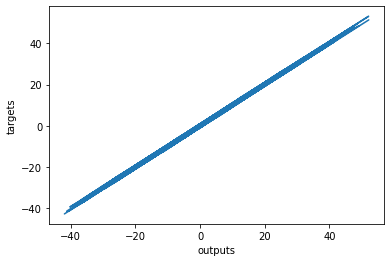

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
# Ten kod rysuje wykres porównujący przewidywane wartości wyjściowe z rzeczywistymi wartościami (tzw. "wykres docelowy").
# model.predict_on_batch() jest wywoływany na danych treningowych, aby otrzymać przewidywane wartości wyjściowe dla każdej obserwacji.
# Wyniki te są przekazywane do funkcji np.squeeze(), która usuwa zbędne wymiary z numpy array (w tym przypadku, usuwa jednowymiarowe wymiary).
# Następnie funkcja plt.plot() jest wywoływana, aby narysować punkty na wykresie.
# Pierwszy argument tej funkcji (np.squeeze(model.predict_on_batch(training_data['inputs']))) to przewidywane wartości wyjściowe, a drugi argument (np.squeeze(training_data['targets'])) to rzeczywiste wartości wyjściowe.
# Oś x wykresu reprezentuje przewidywane wartości, a oś y reprezentuje rzeczywiste wartości.
# Funkcje plt.xlabel() i plt.ylabel() są wywoływane, aby nazwać osie wykresu.
# Ostatecznie funkcja plt.show() jest wywoływana, aby wyświetlić wykres.
# Wykres ten pozwala na łatwe porównanie przewidywanych i rzeczywistych wartości wyjściowych dla każdej obserwacji. Im bardziej punkty są skoncentrowane wzdłuż linii y=x, tym lepszy model ma wynik. W idealnym przypadku wszystkie punkty powinny znajdować się dokładnie na linii y=x.